In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
crimedf = pd.read_csv("/content/Crime_Rate_Data_Baltimore.csv")

In [ ]:
crimedf['Crime_Date_Time'] = crimedf[['CrimeDate', 'CrimeTime']].agg(' '.join, axis=1)

In [ ]:
crimedf['Year'] = crimedf['CrimeDate'].dt.year

In [ ]:
crimedf['CrimeDate'] = pd.to_datetime(crimedf['CrimeDate'])

In [ ]:
crimedf["CrimeTime"]=crimedf["CrimeTime"].apply(lambda x:x[0:2]+":"+x[2:]+":"+"00" if len(x)==4 else x)

In [ ]:
crimedf[crimedf["CrimeTime"]== "24:00:00"] = crimedf[crimedf["CrimeTime"]== "24:00:00"].replace("24:00:00","00:00:00")

In [ ]:
crimedf['CrimeTime'] = pd.to_datetime(crimedf['CrimeTime'])

In [ ]:
crimedf['Inside/Outside'] = crimedf['Inside/Outside'].replace('I', 'Inside')
crimedf['Inside/Outside'] = crimedf['Inside/Outside'].replace('O', 'Outside')
crimedf['Inside/Outside'].unique()

array(['Outside', 'Inside', nan], dtype=object)

In [ ]:
crimedf['Weapon'] = crimedf['Weapon'].fillna('HANDS')
crimedf['Weapon'].unique()

array(['HANDS', 'FIREARM', 'OTHER', 'KNIFE'], dtype=object)

In [ ]:
crimedf = crimedf.dropna()

In [ ]:
crimedf['Total Incidents'].unique()

array([1])

In [ ]:
crimedf

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Crime_Date_Time
0,2016-11-12,2023-09-14 02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,HANDS,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1,11/12/2016 02:35:00
1,2016-11-12,2023-09-14 02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1,11/12/2016 02:56:00
2,2016-11-12,2023-09-14 03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,HANDS,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1,11/12/2016 03:00:00
3,2016-11-12,2023-09-14 03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,HANDS,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1,11/12/2016 03:00:00
4,2016-11-12,2023-09-14 03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,HANDS,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1,11/12/2016 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285802,2011-01-01,2023-09-14 22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,Inside,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1,01/01/2011 22:15:00
285803,2011-01-01,2023-09-14 22:30:00,6J,3000 ODONNELL ST,LARCENY,Inside,HANDS,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1,01/01/2011 22:30:00
285804,2011-01-01,2023-09-14 23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,Outside,HANDS,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1,01/01/2011 23:00:00
285805,2011-01-01,2023-09-14 23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,Inside,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1,01/01/2011 23:25:00


In [ ]:
crimedf.info()
crimedf.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279937 entries, 0 to 285806
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeDate        279937 non-null  datetime64[ns]
 1   CrimeTime        279937 non-null  datetime64[ns]
 2   CrimeCode        279937 non-null  object        
 3   Location         279937 non-null  object        
 4   Description      279937 non-null  object        
 5   Inside/Outside   279937 non-null  object        
 6   Weapon           279937 non-null  object        
 7   Post             279937 non-null  float64       
 8   District         279937 non-null  object        
 9   Neighborhood     279937 non-null  object        
 10  Location 1       279937 non-null  object        
 11  Total Incidents  279937 non-null  int64         
 12  Crime_Date_Time  279937 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 29.9+ 

(279937, 13)

In [ ]:
crimedf.isnull().sum()

CrimeDate          0
CrimeTime          0
CrimeCode          0
Location           0
Description        0
Inside/Outside     0
Weapon             0
Post               0
District           0
Neighborhood       0
Location 1         0
Total Incidents    0
Crime_Date_Time    0
dtype: int64

# **General Questions**

In [ ]:
total_incidents = len(crimedf)
total_incidents

279937

In [ ]:
earliest = crimedf['CrimeDate'].min()
earliest

Timestamp('2011-01-01 00:00:00')

In [ ]:
latest = crimedf['CrimeDate'].max()
latest

Timestamp('2016-11-12 00:00:00')

# **Questions about Types of Crime**

In [ ]:
crime_codes = crimedf['CrimeCode'].unique()
crime_codes

array(['3B', '3CF', '6D', '6E', '4E', '3CO', '3BJ', '5A', '4B', '7A',
       '3AF', '6G', '4F', '4C', '6B', '6C', '4D', '3D', '5B', '6J', '3AK',
       '3AO', '3AJK', '5D', '6F', '3AJF', '5C', '4A', '9S', '1F', '3JF',
       '3K', '3CK', '3P', '3JO', '3LF', '5E', '3AJO', '6A', '3NF', '6L',
       '3EK', '2A', '5F', '3H', '3GO', '3NO', '7C', '3NK', '2B', '8AV',
       '8AO', '8H', '1K', '8EO', '3JK', '3GF', '3EF', '3LO', '8GV', '3M',
       '8J', '8BV', '1O', '8BO', '6H', '8I', '3GK', '3F', '7B', '8FO',
       '3EO', '8CV', '8EV', '8GO', '3LK', '8CO', '6K', '8FV', '8DO'],
      dtype=object)

In [ ]:
crime_code_counts = crimedf['CrimeCode'].value_counts()
crime_code_counts

4E     46627
6D     38033
5A     27161
7A     24816
6G     16262
       ...  
8CV        4
8FV        4
6K         2
3LK        1
8DO        1
Name: CrimeCode, Length: 80, dtype: int64

In [ ]:
crime_with_weapons = crimedf[crimedf['Weapon'] != 'HANDS']
len(crime_with_weapons)

44696

# **Time-Based Questions**

In [ ]:
crime_9_5 = crimedf[(crimedf['CrimeTime'].dt.hour >= 9) & (crimedf['CrimeTime'].dt.hour < 17)]
len(crime_9_5)

103009

In [ ]:
crimedf['DayOfWeek'] = crimedf['CrimeDate'].dt.day_name()
crimedf['DayOfWeek'].value_counts()

Friday       42363
Monday       40877
Wednesday    39971
Tuesday      39911
Thursday     39663
Saturday     39561
Sunday       37591
Name: DayOfWeek, dtype: int64

In [ ]:
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

def classify_season(date):
    month = date.month
    for season, months in seasons.items():
        if month in months:
            return season

crimedf['Season'] = crimedf['CrimeDate'].apply(classify_season)
crimedf['Season'].value_counts()

Summer    77981
Autumn    72442
Spring    71119
Winter    58395
Name: Season, dtype: int64

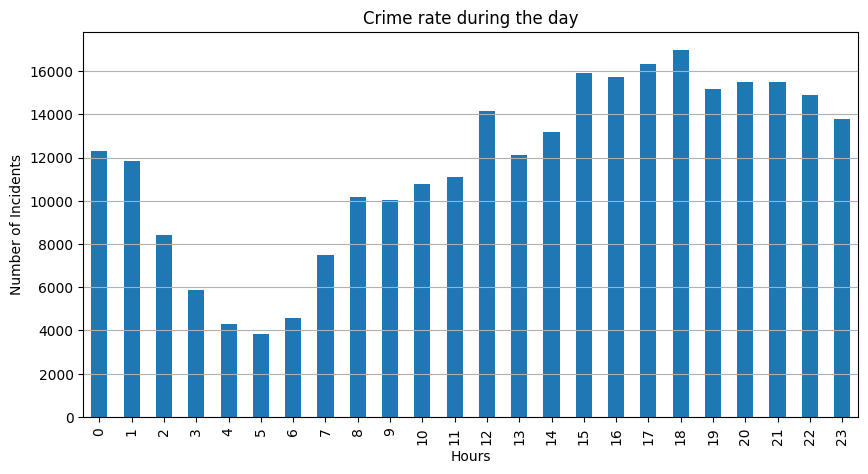

In [ ]:
crime_rate = crimedf.groupby(crimedf['CrimeTime'].dt.hour).size()

crime_rate.plot(kind = 'bar', figsize = (10,5))
plt.title('Crime rate during the day')
plt.xlabel('Hours')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

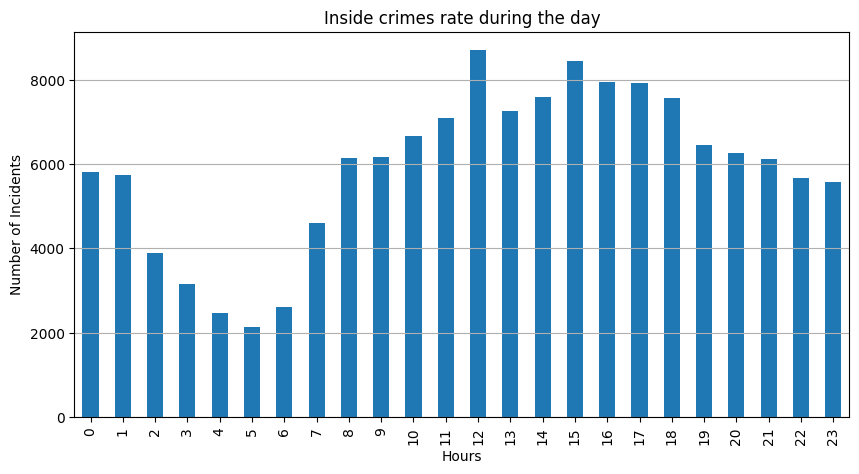

In [ ]:
inside_crimes = crimedf[crimedf['Inside/Outside'] == 'Inside']
crime_rate_inside = inside_crimes.groupby(inside_crimes['CrimeTime'].dt.hour).size()
crime_rate_inside.plot(kind = 'bar', figsize = (10,5))
plt.title('Inside crimes rate during the day')
plt.xlabel('Hours')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

# **Location-Based Questions**

In [ ]:
location_count = crimedf['Location'].value_counts()
top_5_locations = location_count.head(5)
top_5_locations

200 E PRATT ST     663
300 LIGHT ST       529
1500 RUSSELL ST    433
3200 TIOGA PW      433
1200 W PRATT ST    385
Name: Location, dtype: int64

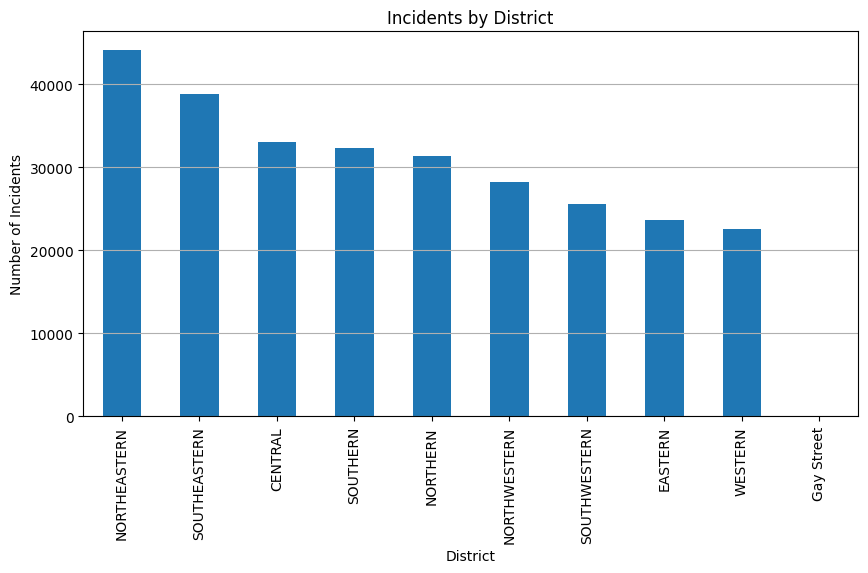

In [ ]:
district_count = crimedf['District'].value_counts()
district_count.plot(kind='bar', figsize = (10,5))
plt.title('Incidents by District')
plt.xlabel('District')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

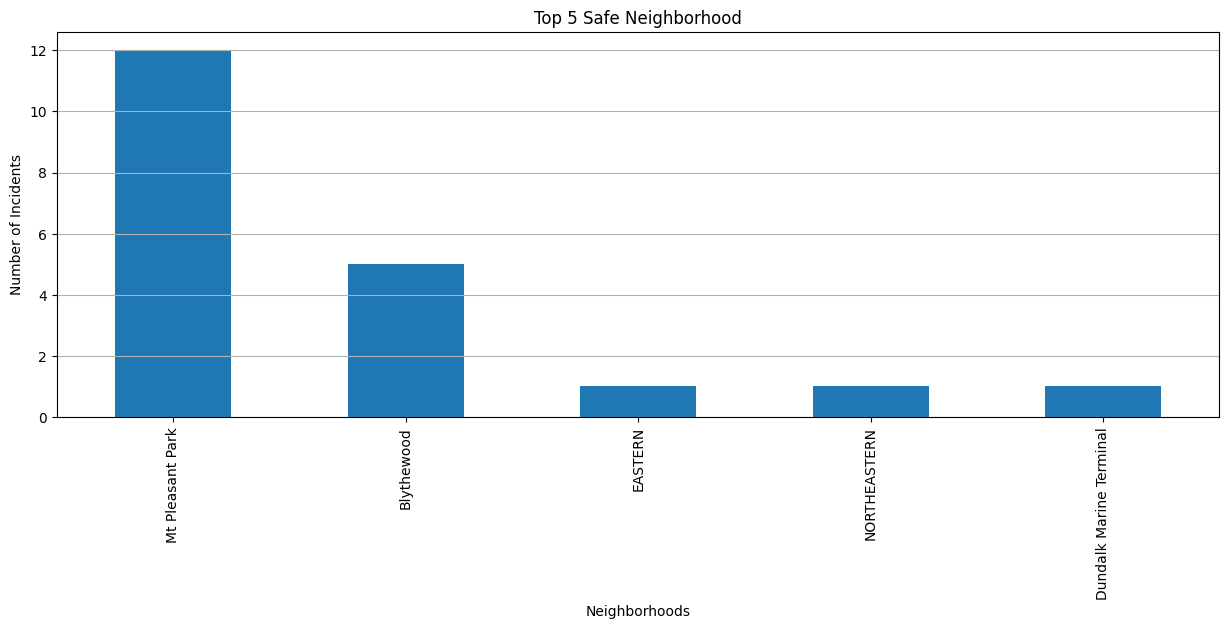

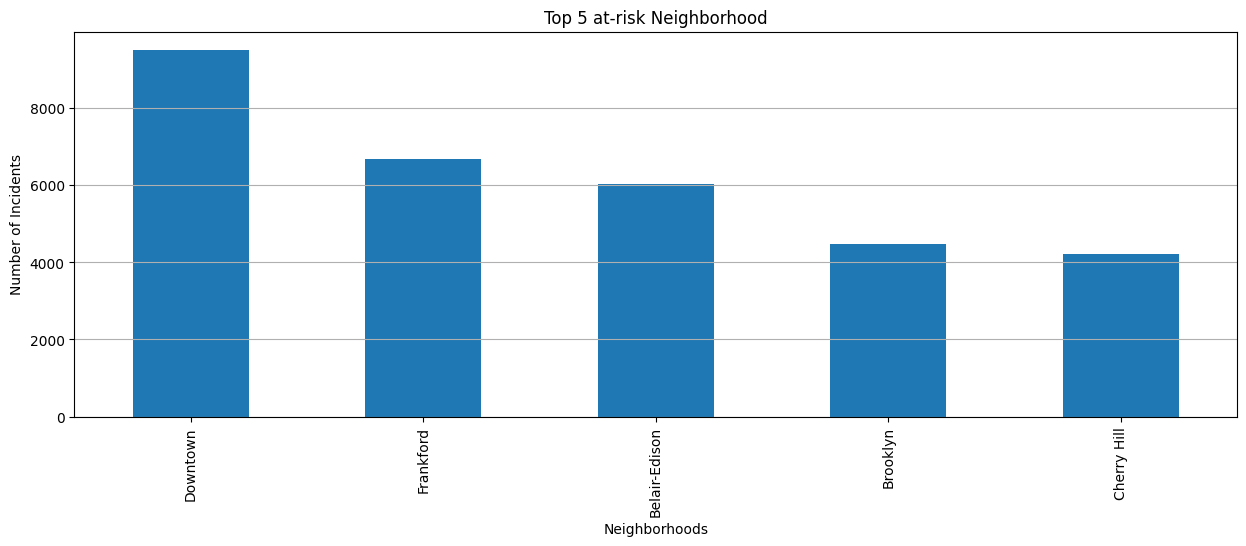

In [ ]:
neighborhood_count = crimedf['Neighborhood'].value_counts()

safe_neighborhood = neighborhood_count.tail(5)
safe_neighborhood.plot(kind='bar', figsize = (15,5))
plt.title('Top 5 Safe Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

at_risk_neighborhood = neighborhood_count.head(5)
at_risk_neighborhood.plot(kind='bar', figsize = (15,5))
plt.title('Top 5 at-risk Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

# **Descriptive Questions**

In [ ]:
most_common_descriptions = crimedf['Description'].value_counts().head(5)
most_common_descriptions

LARCENY              61572
COMMON ASSAULT       46627
BURGLARY             44432
LARCENY FROM AUTO    38033
AGG. ASSAULT         27198
Name: Description, dtype: int64

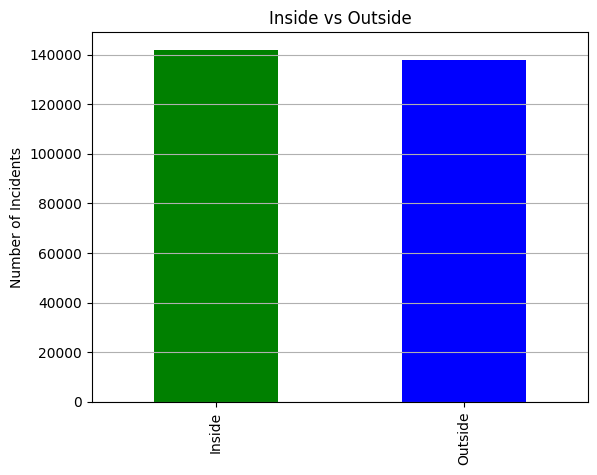

In [ ]:
inside_outside_count = crimedf['Inside/Outside'].value_counts()
inside_outside_count.plot(kind='bar', color=['green', 'blue'])
plt.title('Inside vs Outside')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

# **Weapon-Based Questions**

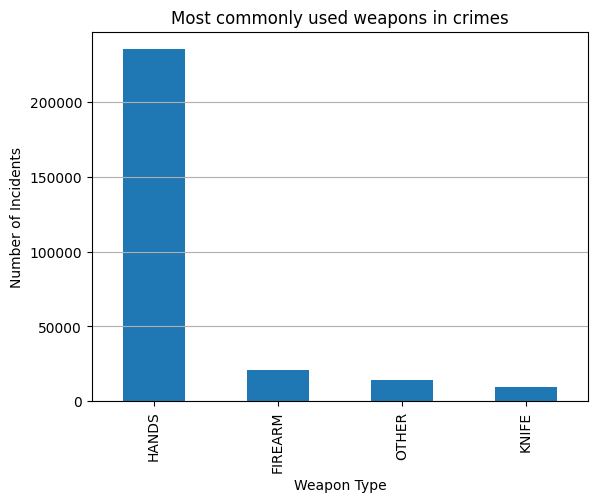

In [ ]:
weapon_counts = crimedf['Weapon'].value_counts()

weapon_counts.plot(kind='bar')
plt.title('Most commonly used weapons in crimes')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

# **Questions Regarding Law Enforcement**

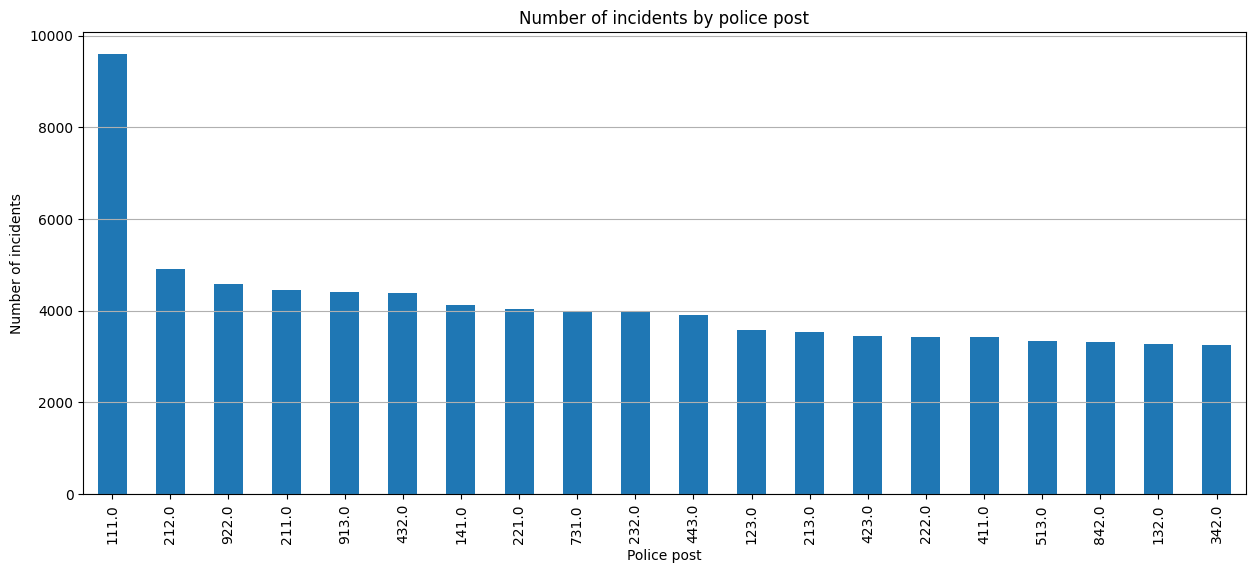

In [ ]:
police_post_counts = crimedf['Post'].value_counts().head(20)

police_post_counts.plot(kind = "bar", figsize=(15, 6))
plt.title('Number of incidents by police post')
plt.xlabel('Police post')
plt.ylabel('Number of incidents')
plt.grid(axis='y')
plt.show()

# **Combined Queries**

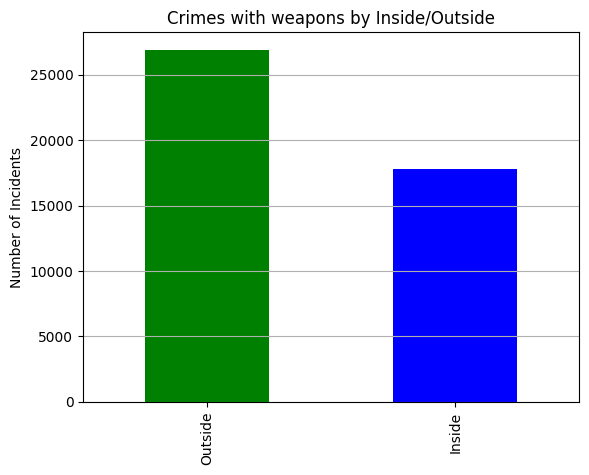

In [ ]:
crime_with_weapons_IO = crime_with_weapons['Inside/Outside'].value_counts()
crime_with_weapons_IO.plot(kind='bar', color = ('green', 'blue'))
plt.title('Crimes with weapons by Inside/Outside')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

<Axes: ylabel='District,Neighborhood,Weapon'>

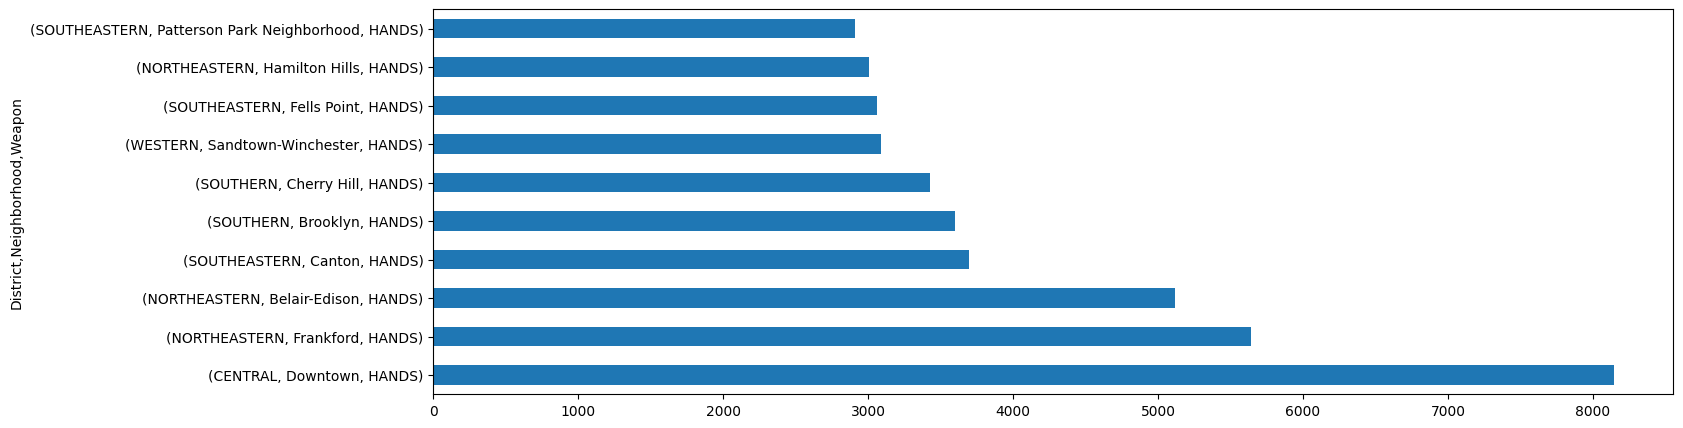

In [ ]:
district_neighbor_weapon = crimedf.groupby(['District','Neighborhood'])['Weapon'].value_counts().sort_values(ascending = False).head(10)
district_neighbor_weapon.plot(kind = 'barh', figsize = (16,5))

In [ ]:
crimedf

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,Crime_Date_Time,DayOfWeek,Season,Year
0,2016-11-12,2023-09-14 02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,HANDS,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1,11/12/2016 02:35:00,Saturday,Autumn,2016
1,2016-11-12,2023-09-14 02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1,11/12/2016 02:56:00,Saturday,Autumn,2016
2,2016-11-12,2023-09-14 03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,HANDS,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1,11/12/2016 03:00:00,Saturday,Autumn,2016
3,2016-11-12,2023-09-14 03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,HANDS,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1,11/12/2016 03:00:00,Saturday,Autumn,2016
4,2016-11-12,2023-09-14 03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,HANDS,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1,11/12/2016 03:00:00,Saturday,Autumn,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285802,2011-01-01,2023-09-14 22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,Inside,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1,01/01/2011 22:15:00,Saturday,Winter,2011
285803,2011-01-01,2023-09-14 22:30:00,6J,3000 ODONNELL ST,LARCENY,Inside,HANDS,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1,01/01/2011 22:30:00,Saturday,Winter,2011
285804,2011-01-01,2023-09-14 23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,Outside,HANDS,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1,01/01/2011 23:00:00,Saturday,Winter,2011
285805,2011-01-01,2023-09-14 23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,Inside,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1,01/01/2011 23:25:00,Saturday,Winter,2011


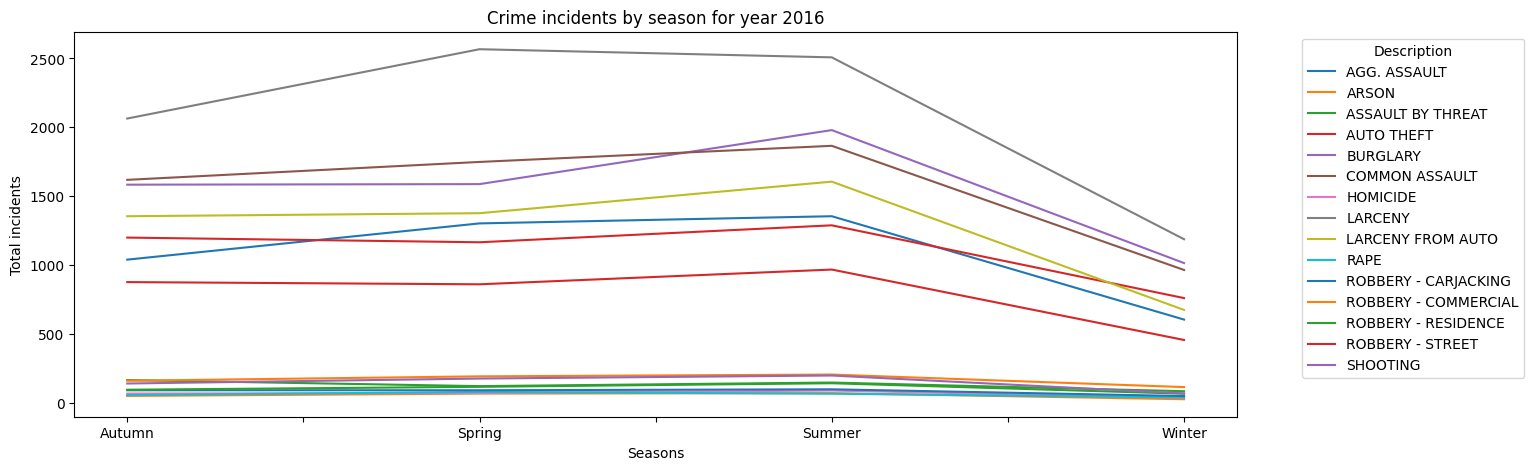

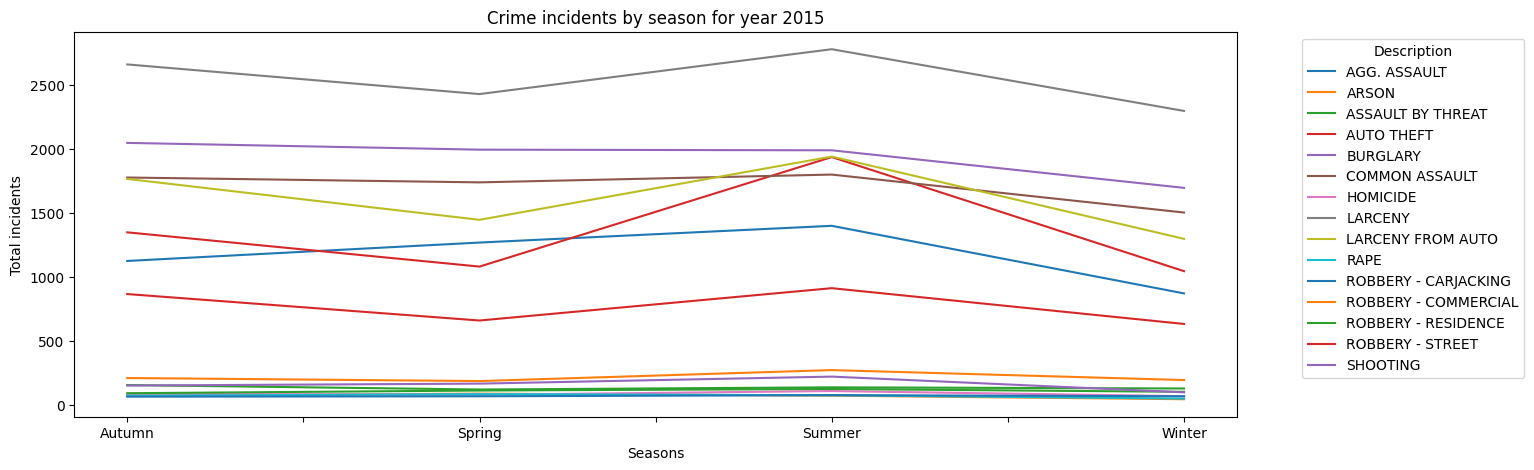

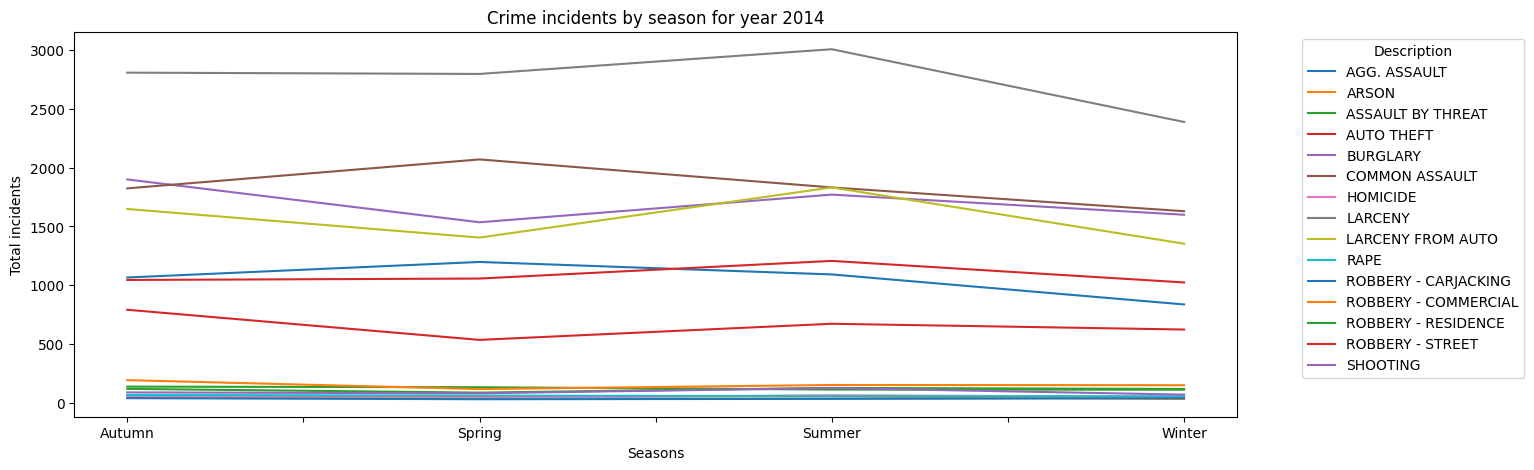

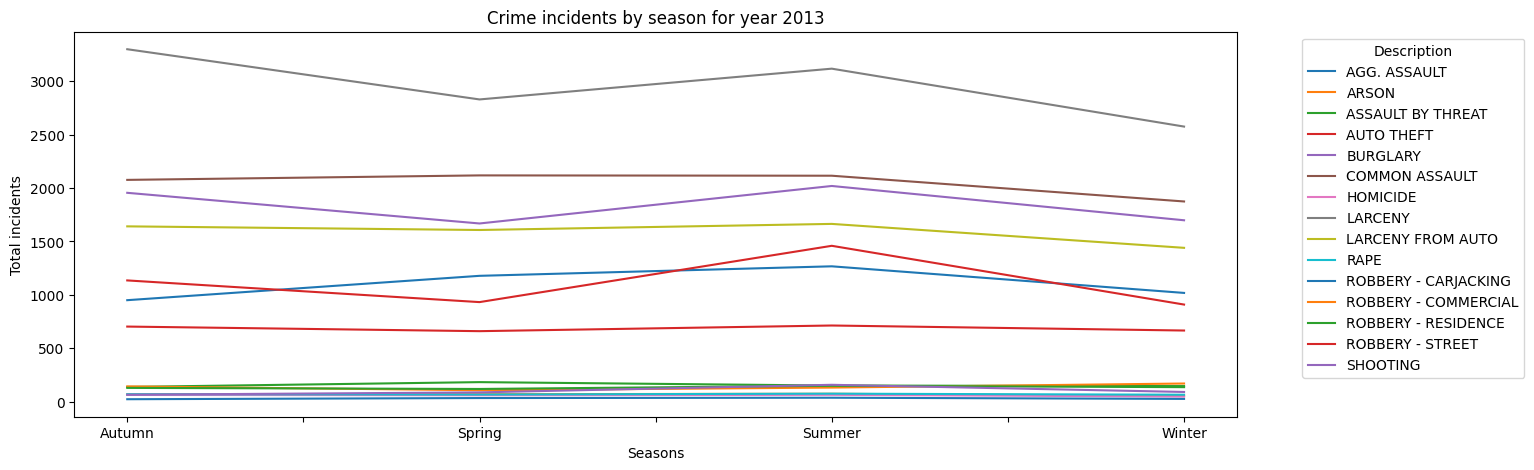

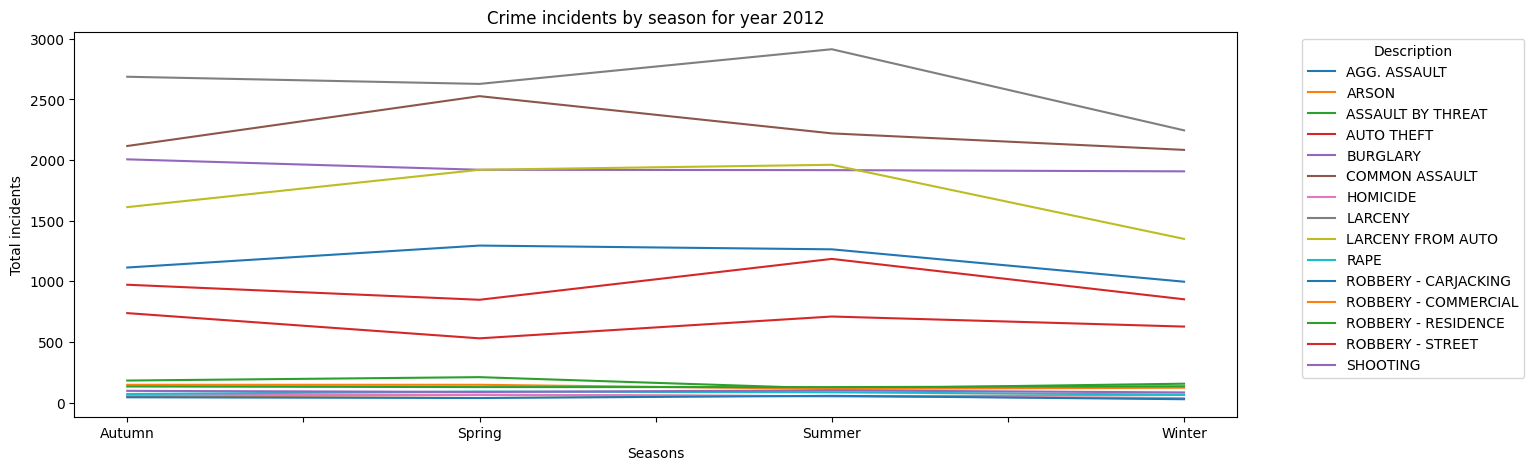

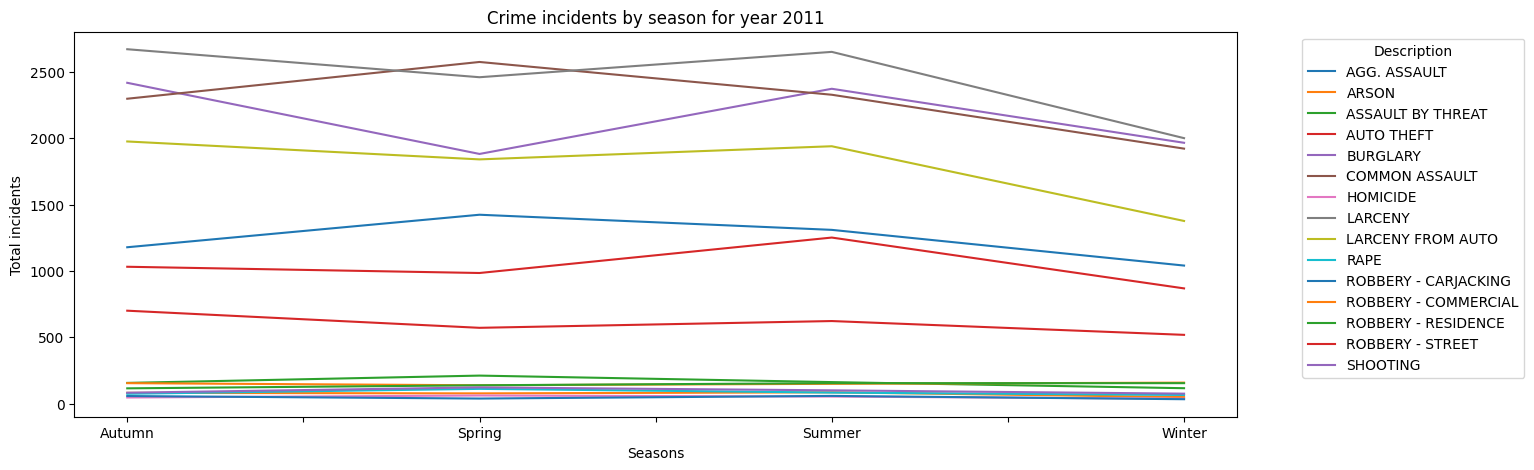

In [ ]:
seasonal = crimedf.groupby(['Year','Season','Description'])['Total Incidents'].sum()

unique_years = crimedf['Year'].unique()
for year in unique_years:
    year_data = seasonal[year].unstack(level='Description')

    year_data.plot(figsize = (15,5))
    plt.title(f'Crime incidents by season for year {year}')
    plt.xlabel('Seasons')
    plt.ylabel('Total incidents')
    plt.legend(title='Description',bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()